# Creating skeletons

!!! note

    This notebook requires `pcg_skel` to be installed. You can install it with `pip install pcg_skel` or upon installing `paleo` with `pip install paleo[skeleton]`.


In [1]:
from caveclient import CAVEclient
from paleo import (
    get_initial_graph,
    get_root_level2_edits,
    get_nucleus_supervoxel,
    get_node_aliases,
)

In [2]:
root_id = 864691135639556411
client = CAVEclient("minnie65_public", version=1078)

## Collect edit history information


In [3]:
edits = get_root_level2_edits(root_id, client)
initial_graph = get_initial_graph(root_id, client)
nuc_supervoxel_id = get_nucleus_supervoxel(root_id, client)
anchor_nodes = get_node_aliases(nuc_supervoxel_id, client, stop_layer=2)

Extracting level2 edits:   0%|          | 0/693 [00:00<?, ?it/s]

Getting initial graph:   0%|          | 0/309 [00:00<?, ?it/s]

## Apply edit history


In [4]:
from paleo import apply_edit_sequence

graphs_by_state = apply_edit_sequence(
    initial_graph,
    edits,
    anchor_nodes,
    return_graphs=True,
    include_initial=True,
    verbose=True,
)
graphs_by_state[9028]

  0%|          | 0/694 [00:00<?, ?it/s]

## Skeletonize states


In [5]:
from paleo import skeletonize_sequence

skeletons_by_state = skeletonize_sequence(
    graphs_by_state, root_id=root_id, client=client
)
skeletons_by_state[9028]

  0%|          | 0/694 [00:00<?, ?it/s]

100%|██████████| 8961/8961 [00:00<00:00, 55987.03it/s]


In [6]:
import pandas as pd 

skeleton_info = []
for i, (operation_id, skeleton) in enumerate(skeletons_by_state.items()):
    skeleton_info.append(
        {
            "state": i,
            "operation_id": operation_id,
            "n_vertices": len(skeleton.vertices),
            "n_edges": len(skeleton.edges),
            "path_length": skeleton.path_length(),
            "n_branch_points": len(skeleton.branch_points),
            "n_end_points": len(skeleton.end_points),
        }
    )

skeleton_info = pd.DataFrame(skeleton_info)

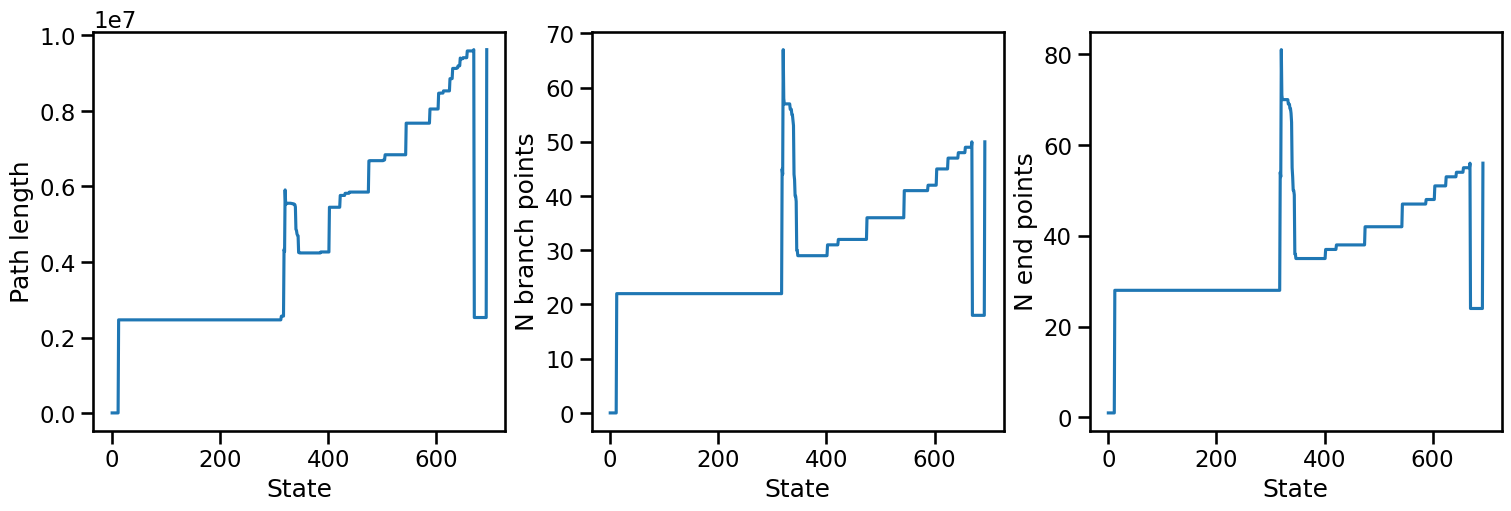

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
fig, axs = plt.subplots(1, 3, figsize=(15, 5), layout="constrained")
for i, feature in enumerate(["path_length", "n_branch_points", "n_end_points"]):
    sns.lineplot(data=skeleton_info, x="state", y=feature, ax=axs[i])
    axs[i].set_ylabel(feature.capitalize().replace("_", " "))
    axs[i].set_xlabel("State")